In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils

dataPath = 'data/shortCorpus.csv'
dataFullPath = 'data/fullCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
df_full = pd.read_csv(dataFullPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

dictFullframeTeste = {
    "tag": [],
    "text": [], 
}
dictFullWithoutAnothersframeTeste = {
    "tag": [],
    "text": [], 
}
formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;
    return False;

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if any(char.isdigit() for char in tok):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            word2index['NUMBER'] = i 
        else: 
            word2index[word] = i
    return word2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            print(word)
            totalUnknow += 1
    if(totalUnknow> 0):        
        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))
    return layer

size of vocanulary is 21216 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 4729
teste 567
treino sem outros 3513
teste sem outros 0


In [8]:

from sklearnClass import SklClass

sklBoW = SklClass()

Vamos testar diferentes metodos de aprendizado supervisionado da biblioteca sklean e ver como eles se comportam com nossos dados. 

In [9]:

sklBoW.fitLinearRegretion(textsTreino, tagsTreino)
sklBoW.testLinearRegretion(textsTest, tagsTest)

KeyboardInterrupt: 

In [10]:
sklBoW.fitLinearRegretion(textsWOTreino, tagsWOTreino)
sklBoW.testLinearRegretion(textsWOTest, tagsWOTest)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

score:      54.563%
              precision    recall  f1-score   support

           0       0.44      0.25      0.32       128
           1       0.51      0.65      0.57       153
           2       0.55      0.60      0.57       115
           3       0.65      0.67      0.66       130

    accuracy                           0.55       526
   macro avg       0.54      0.54      0.53       526
weighted avg       0.54      0.55      0.53       526



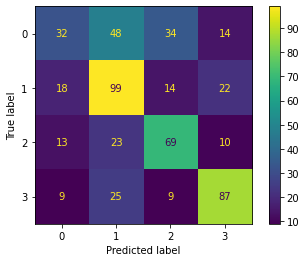

In [10]:
sklBoW.fitRandomForest(textsTreino, tagsTreino)
sklBoW.testRandomForest(textsTest, tagsTest)

score:      70.167%
              precision    recall  f1-score   support

           1       0.71      0.73      0.72       181
           2       0.61      0.69      0.65       110
           3       0.79      0.66      0.72       128

    accuracy                           0.70       419
   macro avg       0.70      0.70      0.70       419
weighted avg       0.71      0.70      0.70       419



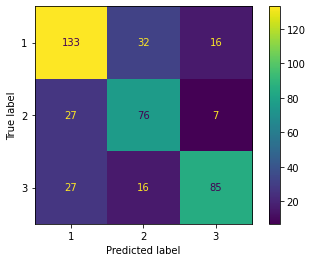

In [11]:
sklBoW.fitRandomForest(textsWOTreino, tagsWOTreino)
sklBoW.testRandomForest(textsWOTest, tagsWOTest)

score:      48.289%
              precision    recall  f1-score   support

           0       0.33      0.18      0.23       128
           1       0.44      0.52      0.48       153
           2       0.52      0.40      0.45       115
           3       0.56      0.82      0.66       130

    accuracy                           0.48       526
   macro avg       0.46      0.48      0.46       526
weighted avg       0.46      0.48      0.46       526



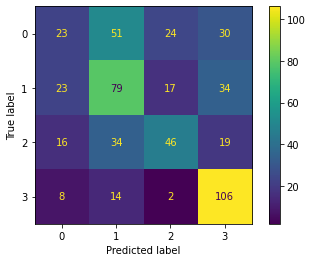

In [12]:
sklBoW.fitLogisticRegression(textsTreino, tagsTreino)
sklBoW.testLogisticRegression(textsTest, tagsTest)

score:      59.666%
              precision    recall  f1-score   support

           1       0.58      0.66      0.62       181
           2       0.55      0.51      0.53       110
           3       0.67      0.58      0.62       128

    accuracy                           0.60       419
   macro avg       0.60      0.58      0.59       419
weighted avg       0.60      0.60      0.60       419



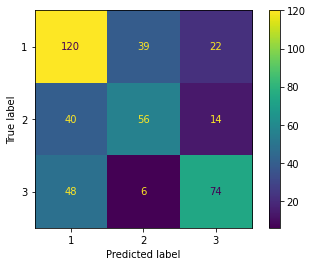

In [13]:
sklBoW.fitLogisticRegression(textsWOTreino, tagsWOTreino)
sklBoW.testLogisticRegression(textsWOTest, tagsWOTest)

score:      54.563%
              precision    recall  f1-score   support

           0       0.41      0.27      0.32       128
           1       0.53      0.67      0.59       153
           2       0.52      0.58      0.55       115
           3       0.69      0.64      0.66       130

    accuracy                           0.55       526
   macro avg       0.54      0.54      0.53       526
weighted avg       0.54      0.55      0.54       526



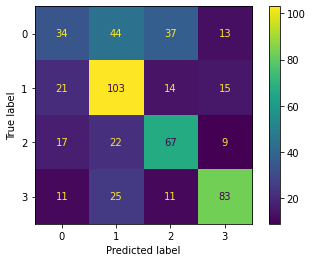

In [14]:
sklBoW.fitExtraTreesClassifier(textsTreino, tagsTreino)
sklBoW.testExtraTreesClassifier(textsTest, tagsTest)

score:      68.735%
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       181
           2       0.61      0.67      0.64       110
           3       0.77      0.64      0.70       128

    accuracy                           0.69       419
   macro avg       0.69      0.68      0.68       419
weighted avg       0.69      0.69      0.69       419



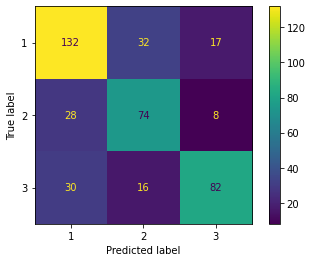

In [15]:
sklBoW.fitExtraTreesClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testExtraTreesClassifier(textsWOTest, tagsWOTest)

score:      42.586%
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       128
           1       0.42      0.49      0.45       153
           2       0.46      0.40      0.43       115
           3       0.53      0.52      0.52       130

    accuracy                           0.43       526
   macro avg       0.43      0.42      0.42       526
weighted avg       0.43      0.43      0.42       526



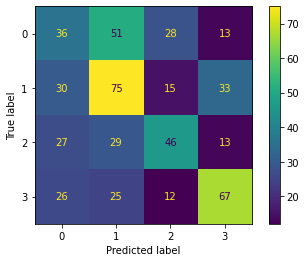

In [16]:
sklBoW.fitDecisionTreeClassifier(textsTreino, tagsTreino)
sklBoW.testDecisionTreeClassifier(textsTest, tagsTest)

score:      64.439%
              precision    recall  f1-score   support

           1       0.69      0.66      0.67       181
           2       0.57      0.59      0.58       110
           3       0.65      0.66      0.66       128

    accuracy                           0.64       419
   macro avg       0.64      0.64      0.64       419
weighted avg       0.65      0.64      0.64       419



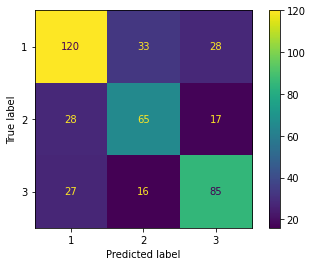

In [17]:
sklBoW.fitDecisionTreeClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testDecisionTreeClassifier(textsWOTest, tagsWOTest)

score:      39.734%
              precision    recall  f1-score   support

           0       0.35      0.40      0.37       128
           1       0.39      0.39      0.39       153
           2       0.39      0.37      0.38       115
           3       0.46      0.42      0.44       130

    accuracy                           0.40       526
   macro avg       0.40      0.40      0.40       526
weighted avg       0.40      0.40      0.40       526



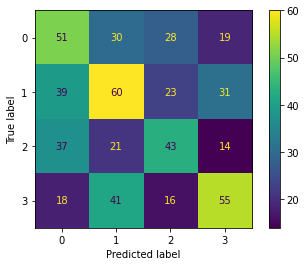

In [18]:
sklBoW.fitKNeighborsClassifier(textsTreino, tagsTreino)
sklBoW.testKNeighborsClassifier(textsTest, tagsTest)

score:      52.029%
              precision    recall  f1-score   support

           1       0.54      0.55      0.55       181
           2       0.45      0.53      0.49       110
           3       0.57      0.47      0.51       128

    accuracy                           0.52       419
   macro avg       0.52      0.52      0.52       419
weighted avg       0.53      0.52      0.52       419



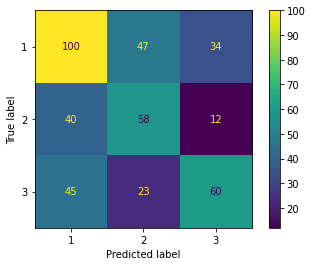

In [19]:
sklBoW.fitKNeighborsClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testKNeighborsClassifier(textsWOTest, tagsWOTest)

score:      46.388%
              precision    recall  f1-score   support

           0       0.40      0.27      0.32       128
           1       0.46      0.46      0.46       153
           2       0.46      0.53      0.49       115
           3       0.51      0.60      0.55       130

    accuracy                           0.46       526
   macro avg       0.46      0.47      0.46       526
weighted avg       0.46      0.46      0.46       526



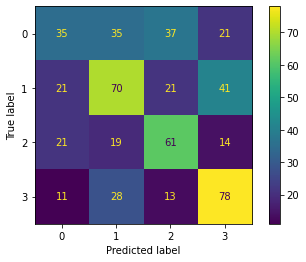

In [20]:
sklBoW.fitBaggingClassifier(textsTreino, tagsTreino)
sklBoW.testBaggingClassifier(textsTest, tagsTest)

score:      60.382%
              precision    recall  f1-score   support

           1       0.62      0.59      0.61       181
           2       0.54      0.64      0.59       110
           3       0.64      0.59      0.62       128

    accuracy                           0.60       419
   macro avg       0.60      0.61      0.60       419
weighted avg       0.61      0.60      0.60       419



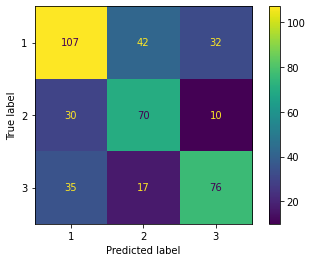

In [21]:
sklBoW.fitBaggingClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testBaggingClassifier(textsWOTest, tagsWOTest)

Como obtivemos melhor resultado com a random forest e Extras trees, vamos passar o corpus inteiro como teste do nosso modelo. 


In [ ]:
#for i in range (len(df_full.index)):
#    tag = df_full.loc[i].iloc[1]
#    tag = formatTag.get(tag, 0)
#    
#    text = df_full.loc[i].iloc[2]

#    tokens = util.tokenize(text)

#    dictFullframeTeste['tag'].append(tag)
#    dictFullframeTeste['text'].append(tokens)
#    if tag != 0:
#        dictFullWithoutAnothersframeTeste['tag'].append(tag)
#        dictFullWithoutAnothersframeTeste['text'].append(tokens)

In [ ]:

#textsFullTest = []
#tagsFullTest = []
#textsFullWOTest = []
#tagsFullWOTTest = []

#for i in range (len(dictFullframeTeste['text'])):
#    textsFullTest.append(text_to_vector(dictFullframeTeste['text'][i]))
#    tagsFullTest.append(dictFullframeTeste['tag'][i])

#for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
#    textsFullWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
#    tagsFullWOTTest.append(dictDataframeWithoutAnothersTeste['tag'][i])

In [ ]:
#print('teste Completo ' + str(len(tagsFullTest)))
#print('teste Completo sem outros ' + str(len(tagsFullWOTTest)))

In [ ]:
#sklBoW.testRandomForest(textsFullTest, tagsFullTest)

In [ ]:
#sklBoW.testRandomForest(textsFullWOTest, tagsFullWOTTest)

In [ ]:
#sklBoW.testExtraTreesClassifier(textsFullTest, tagsFullTest)

In [ ]:
#sklBoW.testExtraTreesClassifier(textsFullWOTest, tagsFullWOTTest)